In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import sys
import os
import time

import numpy as np
from skimage.transform import resize

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from data_manager import *
from metadata import *

Setting environment for Precision WorkStation


No vtk


In [2]:
# output_resolution = 'down32'
output_resolution = '10.0um'

# tb_version = 'NtbNormalized'
tb_version = None
tb_resol = 'thumbnail'

In [16]:
# for stack in ['CHATM2']:
for stack in ['MD661']:

    images = {}

#     for sec in metadata_cache['valid_sections_all'][stack]:
    for sec in metadata_cache['valid_sections'][stack]:

        img_rgb = DataManager.load_image_v2(stack, section=sec, 
                                            resol=tb_resol, 
                                            prep_id='alignedWithMargin', 
                                            version=tb_version)
        img = img_as_ubyte(rgb2gray(img_rgb)) # Use greylevel

        mask = DataManager.load_image_v2(stack=stack, section=sec, 
                                         prep_id='alignedWithMargin', 
                                         resol=tb_resol, 
                                         version='mask')
        img[~mask] = 0

        images[sec] = img

    # Specify isotropic resolution of the output volume.
    voxel_size_um = convert_resolution_string_to_um(resolution=output_resolution, stack=stack)

    input_image_resolution_um = convert_resolution_string_to_um(resolution=tb_resol, stack=stack)

    volume_outVolResol, volume_origin_wrt_wholebrainWithMargin_outVolResol = images_to_volume_v2(images=images, 
                                                spacing_um=20.,
                                                in_resol_um=input_image_resolution_um,
                                                out_resol_um=voxel_size_um)
    print volume_outVolResol.shape
    
    ##############################################################
    
    prep5_origin_wrt_prep1_tbResol = DataManager.load_cropbox_v2(stack=stack, only_2d=True, prep_id='alignedWithMargin')

    loaded_cropbox_resol = 'thumbnail'

    prep5_origin_wrt_prep1_outVolResol = prep5_origin_wrt_prep1_tbResol * \
    convert_resolution_string_to_um(resolution=loaded_cropbox_resol, stack=stack) / voxel_size_um

    wholebrainWithMargin_origin_wrt_wholebrain_outVolResol = np.r_[np.round(prep5_origin_wrt_prep1_outVolResol).astype(np.int)[[0,2]], 0]
    # wholebrainWithMargin_origin_wrt_wholebrain = np.array([0,0,0])

    volume_origin_wrt_wholebrain_outVolResol = volume_origin_wrt_wholebrainWithMargin_outVolResol + wholebrainWithMargin_origin_wrt_wholebrain_outVolResol

    ########################################

    stack_spec = dict(name=stack,
                      resolution=output_resolution,
                      prep_id='wholebrainWithMargin',
                      vol_type='intensity')
    
    save_data(volume_outVolResol, 
              fp=DataManager.get_original_volume_filepath_v2(stack_spec=stack_spec, structure=None))

    save_data(volume_origin_wrt_wholebrain_outVolResol, 
              fp=DataManager.get_original_volume_origin_filepath_v3(stack_spec=stack_spec, structure=None))

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N16-2015.07.16-20.32.33_MD585_2_0047_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N16-2015.07.16-20.32.33_MD585_2_0047_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC16-2015.08.19-13.14.51_MD585_3_0048_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC16-2015.08.19-13.14.51_MD585_3_0048_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N17-2015.07.16-20.35.23_MD585_1_0049_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N17-2015.07.16-20.35.23_MD585_1_0049_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC17-2015.07.16-15.32.03_MD585_1_0049_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC17-2015.07.16-15.32.03_MD585_1_0049_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N17-2015.07.16-20.35.23_MD585_2_0050_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N17-2015.07.16-20.35.23_MD585_2_0050_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC17-2015.07.16-15.32.03_MD585_2_0050_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC17-2015.07.16-15.32.03_MD585_2_0050_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N17-2015.07.16-20.35.23_MD585_3_0051_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N17-2015.07.16-20.35.23_MD585_3_0051_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC17-2015.07.16-15.32.03_MD585_3_0051_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC17-2015.07.16-15.32.03_MD585_3_0051_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N18-2015.07.16-20.39.16_MD585_1_0052_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N18-2015.07.16-20.39.16_MD585_1_0052_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC18-2015.07.16-15.35.58_MD585_1_0052_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC18-2015.07.16-15.35.58_MD585_1_0052_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N18-2015.07.16-20.39.16_MD585_2_0053_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N18-2015.07.16-20.39.16_MD585_2_0053_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC18-2015.07.16-15.35.58_MD585_2_0053_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC18-2015.07.16-15.35.58_MD585_2_0053_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N18-2015.07.16-20.39.16_MD585_3_0054_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N18-2015.07.16-20.39.16_MD585_3_0054_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC18-2015.07.16-15.35.58_MD585_3_0054_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC18-2015.07.16-15.35.58_MD585_3_0054_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N19-2015.07.16-20.43.18_MD585_1_0055_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N19-2015.07.16-20.43.18_MD585_1_0055_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC19-2015.07.16-15.39.52_MD585_1_0055_prep5_thumbnail.tif
/data/CSHL_data_

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N19-2015.07.16-20.43.18_MD585_2_0056_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC19-2015.07.16-15.39.52_MD585_2_0056_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC19-2015.07.16-15.39.52_MD585_2_0056_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N19-2015.07.16-20.43.18_MD585_3_0057_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N19-2015.07.16-20.43.18_MD585_3_0057_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC19-2015.07.16-15.39.52_MD585_3_0057_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC19-2015.07.16-15.39.52_MD585_3_0057_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N20-2015.07.16-20.47.19_MD585_1_0058_prep5_thumbnail.tif
/data/CSHL_data_

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC20-2015.07.16-15.43.53_MD585_1_0058_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N20-2015.07.16-20.47.19_MD585_2_0059_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N20-2015.07.16-20.47.19_MD585_2_0059_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC20-2015.07.16-15.43.53_MD585_2_0059_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC20-2015.07.16-15.43.53_MD585_2_0059_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N20-2015.07.16-20.47.19_MD585_3_0060_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N20-2015.07.16-20.47.19_MD585_3_0060_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC20-2015.07.16-15.43.53_MD585_3_0060_prep5_thumbnail.tif
/data/CSHL_data_

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N21-2015.07.18-07.06.33_MD585_1_0061_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC21-2015.07.16-15.47.52_MD585_1_0061_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC21-2015.07.16-15.47.52_MD585_1_0061_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N21-2015.07.18-07.06.33_MD585_2_0062_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N21-2015.07.18-07.06.33_MD585_2_0062_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC21-2015.07.16-15.47.52_MD585_2_0062_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC21-2015.07.16-15.47.52_MD585_2_0062_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N21-2015.07.18-07.06.33_MD585_3_0063_prep5_thumbnail.tif
/data/CSHL_data_

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC21-2015.07.16-15.47.52_MD585_3_0063_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N22-2015.07.18-07.10.40_MD585_1_0064_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N22-2015.07.18-07.10.40_MD585_1_0064_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC22-2015.07.16-15.51.54_MD585_1_0064_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC22-2015.07.16-15.51.54_MD585_1_0064_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N22-2015.07.18-07.10.40_MD585_2_0065_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N22-2015.07.18-07.10.40_MD585_2_0065_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N22-2015.07.18-07.10.40_MD585_3_0066_prep5_thumbnail.tif
/data/CSHL_data_pr

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC22-2015.07.16-15.51.54_MD585_3_0066_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N23-2015.07.16-20.51.24_MD585_1_0067_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N23-2015.07.16-20.51.24_MD585_1_0067_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC23-2015.08.19-13.18.49_MD585_1_0067_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC23-2015.08.19-13.18.49_MD585_1_0067_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N23-2015.07.16-20.51.24_MD585_2_0068_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N23-2015.07.16-20.51.24_MD585_2_0068_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC23-2015.08.19-13.18.49_MD585_2_0068_prep5_thumbnail.tif
/data/CSHL_data_

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N23-2015.07.16-20.51.24_MD585_3_0069_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC23-2015.08.19-13.18.49_MD585_3_0069_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC23-2015.08.19-13.18.49_MD585_3_0069_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N24-2015.08.19-15.29.12_MD585_1_0070_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N24-2015.08.19-15.29.12_MD585_1_0070_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC24-2015.07.18-07.14.51_MD585_1_0070_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC24-2015.07.18-07.14.51_MD585_1_0070_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N24-2015.08.19-15.29.12_MD585_2_0071_prep5_thumbnail.tif
/data/CSHL_data_

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC24-2015.07.18-07.14.51_MD585_2_0071_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N24-2015.08.19-15.29.12_MD585_3_0072_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N24-2015.08.19-15.29.12_MD585_3_0072_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC24-2015.07.18-07.14.51_MD585_3_0072_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC24-2015.07.18-07.14.51_MD585_3_0072_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N25-2015.08.19-15.33.31_MD585_1_0073_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N25-2015.08.19-15.33.31_MD585_1_0073_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC25-2015.07.18-07.19.12_MD585_1_0073_prep5_thumbnail.tif
/data/CSHL_data_

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N25-2015.08.19-15.33.31_MD585_2_0074_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC25-2015.07.18-07.19.12_MD585_2_0074_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC25-2015.07.18-07.19.12_MD585_2_0074_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N25-2015.08.19-15.33.31_MD585_3_0075_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N25-2015.08.19-15.33.31_MD585_3_0075_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC25-2015.07.18-07.19.12_MD585_3_0075_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC25-2015.07.18-07.19.12_MD585_3_0075_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N26-2015.08.19-15.37.53_MD585_1_0076_prep5_thumbnail.tif
/data/CSHL_data_

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC26-2015.08.19-13.23.15_MD585_1_0076_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N26-2015.08.19-15.37.53_MD585_2_0077_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N26-2015.08.19-15.37.53_MD585_2_0077_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC26-2015.08.19-13.23.15_MD585_2_0077_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC26-2015.08.19-13.23.15_MD585_2_0077_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N26-2015.08.19-15.37.53_MD585_3_0078_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N26-2015.08.19-15.37.53_MD585_3_0078_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC26-2015.08.19-13.23.15_MD585_3_0078_prep5_thumbnail.tif
/data/CSHL_data_

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N27-2015.08.19-15.42.30_MD585_1_0079_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC27-2015.08.19-13.28.05_MD585_1_0079_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC27-2015.08.19-13.28.05_MD585_1_0079_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N27-2015.08.19-15.42.30_MD585_2_0080_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N27-2015.08.19-15.42.30_MD585_2_0080_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC27-2015.08.19-13.28.05_MD585_2_0080_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC27-2015.08.19-13.28.05_MD585_2_0080_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N27-2015.08.19-15.42.30_MD585_3_0081_prep5_thumbnail.tif
/data/CSHL_data_

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC27-2015.08.19-13.28.05_MD585_3_0081_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC27-2015.08.19-13.28.05_MD585_3_0081_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N28-2015.08.19-15.47.09_MD585_1_0082_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N28-2015.08.19-15.47.09_MD585_1_0082_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC28-2015.08.19-13.33.04_MD585_1_0082_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC28-2015.08.19-13.33.04_MD585_1_0082_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N28-2015.08.19-15.47.09_MD585_2_0083_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N28-2015.08.19-15.47.09_MD585_2_0083_prep5_thumbnail_mask.png
/data/CSHL_data_

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC28-2015.08.19-13.33.04_MD585_2_0083_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N28-2015.08.19-15.47.09_MD585_3_0084_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N28-2015.08.19-15.47.09_MD585_3_0084_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC28-2015.08.19-13.33.04_MD585_3_0084_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC28-2015.08.19-13.33.04_MD585_3_0084_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N29-2015.08.19-15.51.55_MD585_1_0085_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N29-2015.08.19-15.51.55_MD585_1_0085_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC29-2015.08.19-13.38.04_MD585_1_0085_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC29-2015.08.19-13.38.04_MD585_1_0085_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N29-2015.07.30-15.11.04_MD585_2_0086_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N29-2015.07.30-15.11.04_MD585_2_0086_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC29-2015.08.19-13.38.04_MD585_2_0086_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC29-2015.08.19-13.38.04_MD585_2_0086_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N29-2015.08.19-15.51.55_MD585_3_0087_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N29-2015.08.19-15.51.55_MD585_3_0087_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC29-2015.08.19-13.38.04_MD585_3_0087_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC29-2015.08.19-13.38.04_MD585_3_0087_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N30-2015.08.19-15.56.52_MD585_1_0088_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N30-2015.08.19-15.56.52_MD585_1_0088_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC30-2015.08.19-13.43.06_MD585_1_0088_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC30-2015.08.19-13.43.06_MD585_1_0088_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N30-2015.08.19-15.56.52_MD585_2_0089_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N30-2015.08.19-15.56.52_MD585_2_0089_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC30-2015.08.19-13.43.06_MD585_2_0089_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC30-2015.08.19-13.43.06_MD585_2_0089_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N30-2015.08.19-15.56.52_MD585_3_0090_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N30-2015.08.19-15.56.52_MD585_3_0090_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC30-2015.08.19-13.43.06_MD585_3_0090_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC30-2015.08.19-13.43.06_MD585_3_0090_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N31-2015.08.19-16.01.47_MD585_1_0091_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N31-2015.08.19-16.01.47_MD585_1_0091_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC31-2015.08.19-13.48.12_MD585_1_0091_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC31-2015.08.19-13.48.12_MD585_1_0091_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N31-2015.08.19-16.01.47_MD585_2_0092_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N31-2015.08.19-16.01.47_MD585_2_0092_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC31-2015.08.19-13.48.12_MD585_2_0092_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC31-2015.08.19-13.48.12_MD585_2_0092_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N31-2015.08.19-16.01.47_MD585_3_0093_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N31-2015.08.19-16.01.47_MD585_3_0093_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC31-2015.08.19-13.48.12_MD585_3_0093_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC31-2015.08.19-13.48.12_MD585_3_0093_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N32-2015.08.19-16.07.10_MD585_1_0094_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N32-2015.08.19-16.07.10_MD585_1_0094_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC32-2015.08.19-13.53.29_MD585_1_0094_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC32-2015.08.19-13.53.29_MD585_1_0094_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N32-2015.08.19-16.07.10_MD585_2_0095_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N32-2015.08.19-16.07.10_MD585_2_0095_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC32-2015.08.19-13.53.29_MD585_2_0095_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC32-2015.08.19-13.53.29_MD585_2_0095_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N32-2015.08.19-16.07.10_MD585_3_0096_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N32-2015.08.19-16.07.10_MD585_3_0096_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC32-2015.08.19-13.53.29_MD585_3_0096_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC32-2015.08.19-13.53.29_MD585_3_0096_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N33-2015.07.16-21.37.52_MD585_1_0097_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N33-2015.07.16-21.37.52_MD585_1_0097_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC33-2015.07.16-16.33.07_MD585_1_0097_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC33-2015.07.16-16.33.07_MD585_1_0097_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N33-2015.07.16-21.37.52_MD585_2_0098_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N33-2015.07.16-21.37.52_MD585_2_0098_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC33-2015.07.16-16.33.07_MD585_2_0098_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC33-2015.07.16-16.33.07_MD585_2_0098_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N33-2015.07.16-21.37.52_MD585_3_0099_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N33-2015.07.16-21.37.52_MD585_3_0099_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC33-2015.07.16-16.33.07_MD585_3_0099_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC33-2015.07.16-16.33.07_MD585_3_0099_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N34-2015.07.16-21.43.03_MD585_1_0100_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N34-2015.07.16-21.43.03_MD585_1_0100_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC34-2015.07.16-16.38.23_MD585_1_0100_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC34-2015.07.16-16.38.23_MD585_1_0100_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N34-2015.07.16-21.43.03_MD585_2_0101_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N34-2015.07.16-21.43.03_MD585_2_0101_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC34-2015.07.16-16.38.23_MD585_2_0101_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC34-2015.07.16-16.38.23_MD585_2_0101_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N34-2015.07.16-21.43.03_MD585_3_0102_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N34-2015.07.16-21.43.03_MD585_3_0102_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC34-2015.07.16-16.38.23_MD585_3_0102_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC34-2015.07.16-16.38.23_MD585_3_0102_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N35-2015.07.16-21.48.15_MD585_1_0103_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N35-2015.07.16-21.48.15_MD585_1_0103_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC35-2015.07.16-16.43.41_MD585_1_0103_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC35-2015.07.16-16.43.41_MD585_1_0103_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N35-2015.07.16-21.48.15_MD585_2_0104_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N35-2015.07.16-21.48.15_MD585_2_0104_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC35-2015.07.16-16.43.41_MD585_2_0104_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC35-2015.07.16-16.43.41_MD585_2_0104_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N35-2015.07.16-21.48.15_MD585_3_0105_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N35-2015.07.16-21.48.15_MD585_3_0105_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC35-2015.07.16-16.43.41_MD585_3_0105_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC35-2015.07.16-16.43.41_MD585_3_0105_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N36-2015.07.16-21.53.31_MD585_1_0106_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N36-2015.07.16-21.53.31_MD585_1_0106_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC36-2015.08.19-13.58.57_MD585_1_0106_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC36-2015.08.19-13.58.57_MD585_1_0106_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N36-2015.07.16-21.53.31_MD585_2_0107_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N36-2015.07.16-21.53.31_MD585_2_0107_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC36-2015.08.19-13.58.57_MD585_2_0107_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC36-2015.08.19-13.58.57_MD585_2_0107_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N36-2015.07.16-21.53.31_MD585_3_0108_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N36-2015.07.16-21.53.31_MD585_3_0108_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC36-2015.08.19-13.58.57_MD585_3_0108_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC36-2015.08.19-13.58.57_MD585_3_0108_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N37-2015.07.16-21.59.03_MD585_1_0109_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N37-2015.07.16-21.59.03_MD585_1_0109_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC37-2015.08.19-14.04.32_MD585_1_0109_prep5_thumbnail.tif
/data/CSHL_data_

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N37-2015.07.16-21.59.03_MD585_2_0110_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N37-2015.07.16-21.59.03_MD585_2_0110_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC37-2015.08.19-14.04.32_MD585_2_0110_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC37-2015.08.19-14.04.32_MD585_2_0110_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N37-2015.07.16-21.59.03_MD585_3_0111_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N37-2015.07.16-21.59.03_MD585_3_0111_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC37-2015.08.19-14.04.32_MD585_3_0111_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC37-2015.08.19-14.04.32_MD585_3_0111_prep5_thumbnail_mask.png
/data/CSHL_data_

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N38-2015.07.16-22.04.12_MD585_1_0112_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC38-2015.07.16-17.00.35_MD585_1_0112_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC38-2015.07.16-17.00.35_MD585_1_0112_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N38-2015.07.16-22.04.12_MD585_2_0113_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N38-2015.07.16-22.04.12_MD585_2_0113_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC38-2015.07.16-17.00.35_MD585_2_0113_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC38-2015.07.16-17.00.35_MD585_2_0113_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N38-2015.07.16-22.04.12_MD585_3_0114_prep5_thumbnail.tif
/data/CSHL_data_

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC39-2015.08.19-14.10.09_MD585_2_0116_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N39-2015.07.16-22.09.19_MD585_3_0117_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N39-2015.07.16-22.09.19_MD585_3_0117_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC39-2015.08.19-14.10.09_MD585_3_0117_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC39-2015.08.19-14.10.09_MD585_3_0117_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N40-2015.07.16-22.14.28_MD585_1_0118_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N40-2015.07.16-22.14.28_MD585_1_0118_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC40-2015.08.19-14.15.44_MD585_1_0118_prep5_thumbnail.tif
/data/CSHL_data_

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N40-2015.07.16-22.14.28_MD585_2_0119_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC40-2015.08.19-14.15.44_MD585_2_0119_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC40-2015.08.19-14.15.44_MD585_2_0119_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N40-2015.07.16-22.14.28_MD585_3_0120_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N40-2015.07.16-22.14.28_MD585_3_0120_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC40-2015.08.19-14.15.44_MD585_3_0120_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC40-2015.08.19-14.15.44_MD585_3_0120_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N41-2015.07.16-22.19.30_MD585_1_0121_prep5_thumbnail.tif
/data/CSHL_data_

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC41-2015.08.19-14.21.09_MD585_1_0121_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC41-2015.08.19-14.21.09_MD585_1_0121_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N41-2015.07.16-22.19.30_MD585_2_0122_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N41-2015.07.16-22.19.30_MD585_2_0122_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC41-2015.08.19-14.21.09_MD585_2_0122_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC41-2015.08.19-14.21.09_MD585_2_0122_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N41-2015.07.16-22.19.30_MD585_3_0123_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N41-2015.07.16-22.19.30_MD585_3_0123_prep5_thumbnail_mask.png
/data/CSHL_data_

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC41-2015.08.19-14.21.09_MD585_3_0123_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N42-2015.07.16-22.24.42_MD585_1_0124_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N42-2015.07.16-22.24.42_MD585_1_0124_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC42-2015.08.19-14.26.30_MD585_1_0124_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC42-2015.08.19-14.26.30_MD585_1_0124_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N42-2015.07.16-22.24.42_MD585_2_0125_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N42-2015.07.16-22.24.42_MD585_2_0125_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC42-2015.08.19-14.26.30_MD585_2_0125_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC42-2015.08.19-14.26.30_MD585_2_0125_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N42-2015.07.16-22.24.42_MD585_3_0126_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N42-2015.07.16-22.24.42_MD585_3_0126_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC42-2015.08.19-14.26.30_MD585_3_0126_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC42-2015.08.19-14.26.30_MD585_3_0126_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N43-2015.07.16-22.29.50_MD585_1_0127_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N43-2015.07.16-22.29.50_MD585_1_0127_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC43-2015.08.19-14.32.02_MD585_1_0127_prep5_thumbnail.tif
/data/CSHL_data_

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.



/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N43-2015.07.16-22.29.50_MD585_2_0128_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC43-2015.08.19-14.32.02_MD585_2_0128_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC43-2015.08.19-14.32.02_MD585_2_0128_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N43-2015.07.16-22.29.50_MD585_3_0129_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N43-2015.07.16-22.29.50_MD585_3_0129_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC43-2015.08.19-14.32.02_MD585_3_0129_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC43-2015.08.19-14.32.02_MD585_3_0129_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N44-2015.07.16-22.35.02_MD585_1_0130_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N44-2015.07.16-22.35.02_MD585_1_0130_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC44-2015.08.19-14.37.23_MD585_1_0130_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC44-2015.08.19-14.37.23_MD585_1_0130_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N44-2015.07.16-22.35.02_MD585_2_0131_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N44-2015.07.16-22.35.02_MD585_2_0131_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC44-2015.08.19-14.37.23_MD585_2_0131_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC44-2015.08.19-14.37.23_MD585_2_0131_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N44-2015.07.16-22.35.02_MD585_3_0132_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N44-2015.07.16-22.35.02_MD585_3_0132_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC44-2015.08.19-14.37.23_MD585_3_0132_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC44-2015.08.19-14.37.23_MD585_3_0132_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N45-2015.07.16-22.40.26_MD585_1_0133_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N45-2015.07.16-22.40.26_MD585_1_0133_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC45-2015.08.19-14.42.34_MD585_1_0133_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC45-2015.08.19-14.42.34_MD585_1_0133_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N45-2015.07.16-22.40.26_MD585_2_0134_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N45-2015.07.16-22.40.26_MD585_2_0134_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC45-2015.08.19-14.42.34_MD585_2_0134_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC45-2015.08.19-14.42.34_MD585_2_0134_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N45-2015.07.16-22.40.26_MD585_3_0135_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N45-2015.07.16-22.40.26_MD585_3_0135_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC45-2015.08.19-14.42.34_MD585_3_0135_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC45-2015.08.19-14.42.34_MD585_3_0135_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N46-2015.07.16-22.45.37_MD585_1_0136_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N46-2015.07.16-22.45.37_MD585_1_0136_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC46-2015.08.19-14.47.51_MD585_1_0136_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC46-2015.08.19-14.47.51_MD585_1_0136_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N46-2015.07.16-22.45.37_MD585_2_0137_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N46-2015.07.16-22.45.37_MD585_2_0137_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC46-2015.08.19-14.47.51_MD585_2_0137_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC46-2015.08.19-14.47.51_MD585_2_0137_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N46-2015.07.16-22.45.37_MD585_3_0138_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N46-2015.07.16-22.45.37_MD585_3_0138_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC46-2015.08.19-14.47.51_MD585_3_0138_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC46-2015.08.19-14.47.51_MD585_3_0138_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N47-2015.07.16-22.50.52_MD585_1_0139_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N47-2015.07.16-22.50.52_MD585_1_0139_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC47-2015.08.19-14.53.04_MD585_1_0139_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC47-2015.08.19-14.53.04_MD585_1_0139_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N47-2015.07.16-22.50.52_MD585_2_0140_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N47-2015.07.16-22.50.52_MD585_2_0140_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC47-2015.08.19-14.53.04_MD585_2_0140_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC47-2015.08.19-14.53.04_MD585_2_0140_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N47-2015.07.16-22.50.52_MD585_3_0141_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N47-2015.07.16-22.50.52_MD585_3_0141_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC47-2015.08.19-14.53.04_MD585_3_0141_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC47-2015.08.19-14.53.04_MD585_3_0141_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N48-2015.07.16-22.56.02_MD585_1_0142_prep5_thumbnail.tif
/data/CSHL_data_

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC48-2015.08.19-14.58.14_MD585_1_0142_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC48-2015.08.19-14.58.14_MD585_1_0142_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N48-2015.07.16-22.56.02_MD585_2_0143_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N48-2015.07.16-22.56.02_MD585_2_0143_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC48-2015.08.19-14.58.14_MD585_2_0143_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC48-2015.08.19-14.58.14_MD585_2_0143_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N48-2015.07.16-22.56.02_MD585_3_0144_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N48-2015.07.16-22.56.02_MD585_3_0144_prep5_thumbnail_mask.png
/data/CSHL_data_

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N49-2015.07.16-23.01.02_MD585_1_0145_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N49-2015.07.16-23.01.02_MD585_1_0145_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC49-2015.07.16-17.58.21_MD585_3_0147_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC49-2015.07.16-17.58.21_MD585_3_0147_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N49-2015.07.16-23.01.02_MD585_2_0146_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N49-2015.07.16-23.01.02_MD585_2_0146_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC49-2015.07.16-17.58.21_MD585_2_0146_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC49-2015.07.16-17.58.21_MD585_2_0146_prep5_thumbnail_mask.png
/data/CSHL_data_

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N49-2015.07.16-23.01.02_MD585_3_0147_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC49-2015.07.16-17.58.21_MD585_1_0145_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC49-2015.07.16-17.58.21_MD585_1_0145_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N50-2015.07.16-23.05.49_MD585_1_0148_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N50-2015.07.16-23.05.49_MD585_1_0148_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC50-2015.07.16-18.02.54_MD585_3_0150_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC50-2015.07.16-18.02.54_MD585_3_0150_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N50-2015.07.16-23.05.49_MD585_2_0149_prep5_thumbnail.tif
/data/CSHL_data_

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC50-2015.07.16-18.02.54_MD585_2_0149_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC50-2015.07.16-18.02.54_MD585_2_0149_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N50-2015.07.16-23.05.49_MD585_3_0150_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N50-2015.07.16-23.05.49_MD585_3_0150_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC50-2015.07.16-18.02.54_MD585_1_0148_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC50-2015.07.16-18.02.54_MD585_1_0148_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N51-2015.07.16-23.10.35_MD585_1_0151_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N51-2015.07.16-23.10.35_MD585_1_0151_prep5_thumbnail_mask.png


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC51-2015.08.19-15.03.10_MD585_1_0151_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC51-2015.08.19-15.03.10_MD585_1_0151_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N51-2015.07.16-23.10.35_MD585_2_0152_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N51-2015.07.16-23.10.35_MD585_2_0152_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC51-2015.08.19-15.03.10_MD585_2_0152_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC51-2015.08.19-15.03.10_MD585_2_0152_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N51-2015.07.16-23.10.35_MD585_3_0153_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N51-2015.07.16-23.10.35_MD585_3_0153_prep5_thumbnail_mask.png
/data/CSHL_data_

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC51-2015.08.19-15.03.10_MD585_3_0153_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N52-2015.08.19-16.12.22_MD585_1_0154_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N52-2015.08.19-16.12.22_MD585_1_0154_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC52-2015.08.19-15.07.35_MD585_1_0154_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC52-2015.08.19-15.07.35_MD585_1_0154_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N52-2015.08.19-16.12.22_MD585_2_0155_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N52-2015.08.19-16.12.22_MD585_2_0155_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC52-2015.08.19-15.07.35_MD585_2_0155_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC52-2015.08.19-15.07.35_MD585_2_0155_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC52-2015.08.19-15.07.35_MD585_3_0156_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC52-2015.08.19-15.07.35_MD585_3_0156_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N53-2015.08.19-16.16.47_MD585_1_0157_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N53-2015.08.19-16.16.47_MD585_1_0157_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC53-2015.08.19-15.12.08_MD585_1_0157_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC53-2015.08.19-15.12.08_MD585_1_0157_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N53-2015.08.19-16.16.47_MD585_2_0158_prep5_thumbnail.tif
/data/CSHL_dat

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC53-2015.08.19-15.12.08_MD585_2_0158_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC53-2015.08.19-15.12.08_MD585_2_0158_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N53-2015.08.19-16.16.47_MD585_3_0159_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N53-2015.08.19-16.16.47_MD585_3_0159_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC53-2015.08.19-15.12.08_MD585_3_0159_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC53-2015.08.19-15.12.08_MD585_3_0159_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N54-2015.08.19-16.21.14_MD585_1_0160_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N54-2015.08.19-16.21.14_MD585_1_0160_prep5_thumbnail_mask.png
/data/CSHL_data_

Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC54-2015.08.19-15.16.31_MD585_1_0160_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N54-2015.08.19-16.21.14_MD585_2_0161_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N54-2015.08.19-16.21.14_MD585_2_0161_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC54-2015.08.19-15.16.31_MD585_2_0161_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC54-2015.08.19-15.16.31_MD585_2_0161_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N54-2015.08.19-16.21.14_MD585_3_0162_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N54-2015.08.19-16.21.14_MD585_3_0162_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC54-2015.08.19-15.16.31_MD585_3_0162_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC54-2015.08.19-15.16.31_MD585_3_0162_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N55-2015.08.19-16.25.32_MD585_1_0163_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N55-2015.08.19-16.25.32_MD585_1_0163_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC55-2015.08.19-15.21.01_MD585_1_0163_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC55-2015.08.19-15.21.01_MD585_1_0163_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N55-2015.08.19-16.25.32_MD585_2_0164_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N55-2015.08.19-16.25.32_MD585_2_0164_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC55-2015.08.19-15.21.01_MD585_2_0164_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC55-2015.08.19-15.21.01_MD585_2_0164_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N55-2015.08.19-16.25.32_MD585_3_0165_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N55-2015.08.19-16.25.32_MD585_3_0165_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC55-2015.08.19-15.21.01_MD585_3_0165_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC55-2015.08.19-15.21.01_MD585_3_0165_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N56-2015.07.16-23.31.53_MD585_1_0166_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N56-2015.07.16-23.31.53_MD585_1_0166_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC56-2015.07.16-18.29.48_MD585_1_0166_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC56-2015.07.16-18.29.48_MD585_1_0166_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N56-2015.07.16-23.31.53_MD585_2_0167_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N56-2015.07.16-23.31.53_MD585_2_0167_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC56-2015.07.16-18.29.48_MD585_2_0167_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC56-2015.07.16-18.29.48_MD585_2_0167_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N56-2015.07.16-23.31.53_MD585_3_0168_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N56-2015.07.16-23.31.53_MD585_3_0168_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC56-2015.07.16-18.29.48_MD585_3_0168_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC56-2015.07.16-18.29.48_MD585_3_0168_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N57-2015.07.16-23.36.08_MD585_1_0169_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N57-2015.07.16-23.36.08_MD585_1_0169_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC57-2015.07.16-18.33.52_MD585_1_0169_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC57-2015.07.16-18.33.52_MD585_1_0169_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N57-2015.07.16-23.36.08_MD585_2_0170_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N57-2015.07.16-23.36.08_MD585_2_0170_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC57-2015.07.16-18.33.52_MD585_2_0170_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC57-2015.07.16-18.33.52_MD585_2_0170_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N57-2015.07.16-23.36.08_MD585_3_0171_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N57-2015.07.16-23.36.08_MD585_3_0171_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC57-2015.07.16-18.33.52_MD585_3_0171_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC57-2015.07.16-18.33.52_MD585_3_0171_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N58-2015.07.16-23.40.18_MD585_1_0172_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N58-2015.07.16-23.40.18_MD585_1_0172_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC58-2015.07.16-18.38.08_MD585_1_0172_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC58-2015.07.16-18.38.08_MD585_1_0172_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N58-2015.07.16-23.40.18_MD585_2_0173_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N58-2015.07.16-23.40.18_MD585_2_0173_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC58-2015.07.16-18.38.08_MD585_2_0173_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC58-2015.07.16-18.38.08_MD585_2_0173_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N58-2015.07.16-23.40.18_MD585_3_0174_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N58-2015.07.16-23.40.18_MD585_3_0174_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC58-2015.07.16-18.38.08_MD585_3_0174_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC58-2015.07.16-18.38.08_MD585_3_0174_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N59-2015.07.16-23.44.31_MD585_3_0177_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N59-2015.07.16-23.44.31_MD585_3_0177_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC59-2015.07.16-18.42.14_MD585_1_0175_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC59-2015.07.16-18.42.14_MD585_1_0175_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N59-2015.07.16-23.44.31_MD585_2_0176_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N59-2015.07.16-23.44.31_MD585_2_0176_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC59-2015.07.16-18.42.14_MD585_2_0176_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC59-2015.07.16-18.42.14_MD585_2_0176_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N59-2015.07.16-23.44.31_MD585_1_0175_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N59-2015.07.16-23.44.31_MD585_1_0175_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC59-2015.07.16-18.42.14_MD585_3_0177_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC59-2015.07.16-18.42.14_MD585_3_0177_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N60-2015.07.16-23.48.44_MD585_1_0178_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N60-2015.07.16-23.48.44_MD585_1_0178_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC60-2015.08.19-15.25.07_MD585_1_0178_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC60-2015.08.19-15.25.07_MD585_1_0178_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N60-2015.07.16-23.48.44_MD585_2_0179_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N60-2015.07.16-23.48.44_MD585_2_0179_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC60-2015.08.19-15.25.07_MD585_2_0179_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC60-2015.08.19-15.25.07_MD585_2_0179_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N60-2015.07.16-23.48.44_MD585_3_0180_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N60-2015.07.16-23.48.44_MD585_3_0180_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC60-2015.08.19-15.25.07_MD585_3_0180_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC60-2015.08.19-15.25.07_MD585_3_0180_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N61-2015.07.16-23.52.50_MD585_1_0181_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N61-2015.07.16-23.52.50_MD585_1_0181_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC61-2015.07.16-18.50.40_MD585_3_0183_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC61-2015.07.16-18.50.40_MD585_3_0183_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-N61-2015.07.16-23.52.50_MD585_2_0182_prep5_thumbnail.tif
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-N61-2015.07.16-23.52.50_MD585_2_0182_prep5_thumbnail_mask.png
/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail/MD585-IHC61-2015.07.16-18.50.40_MD585_2_0182_prep5_thumbnail.tif


Not using image_cache.
Not using image_cache.
Not using image_cache.


/data/CSHL_data_processed/MD585/MD585_prep5_thumbnail_mask/MD585-IHC61-2015.07.16-18.50.40_MD585_2_0182_prep5_thumbnail_mask.png
(911, 1531, 541)


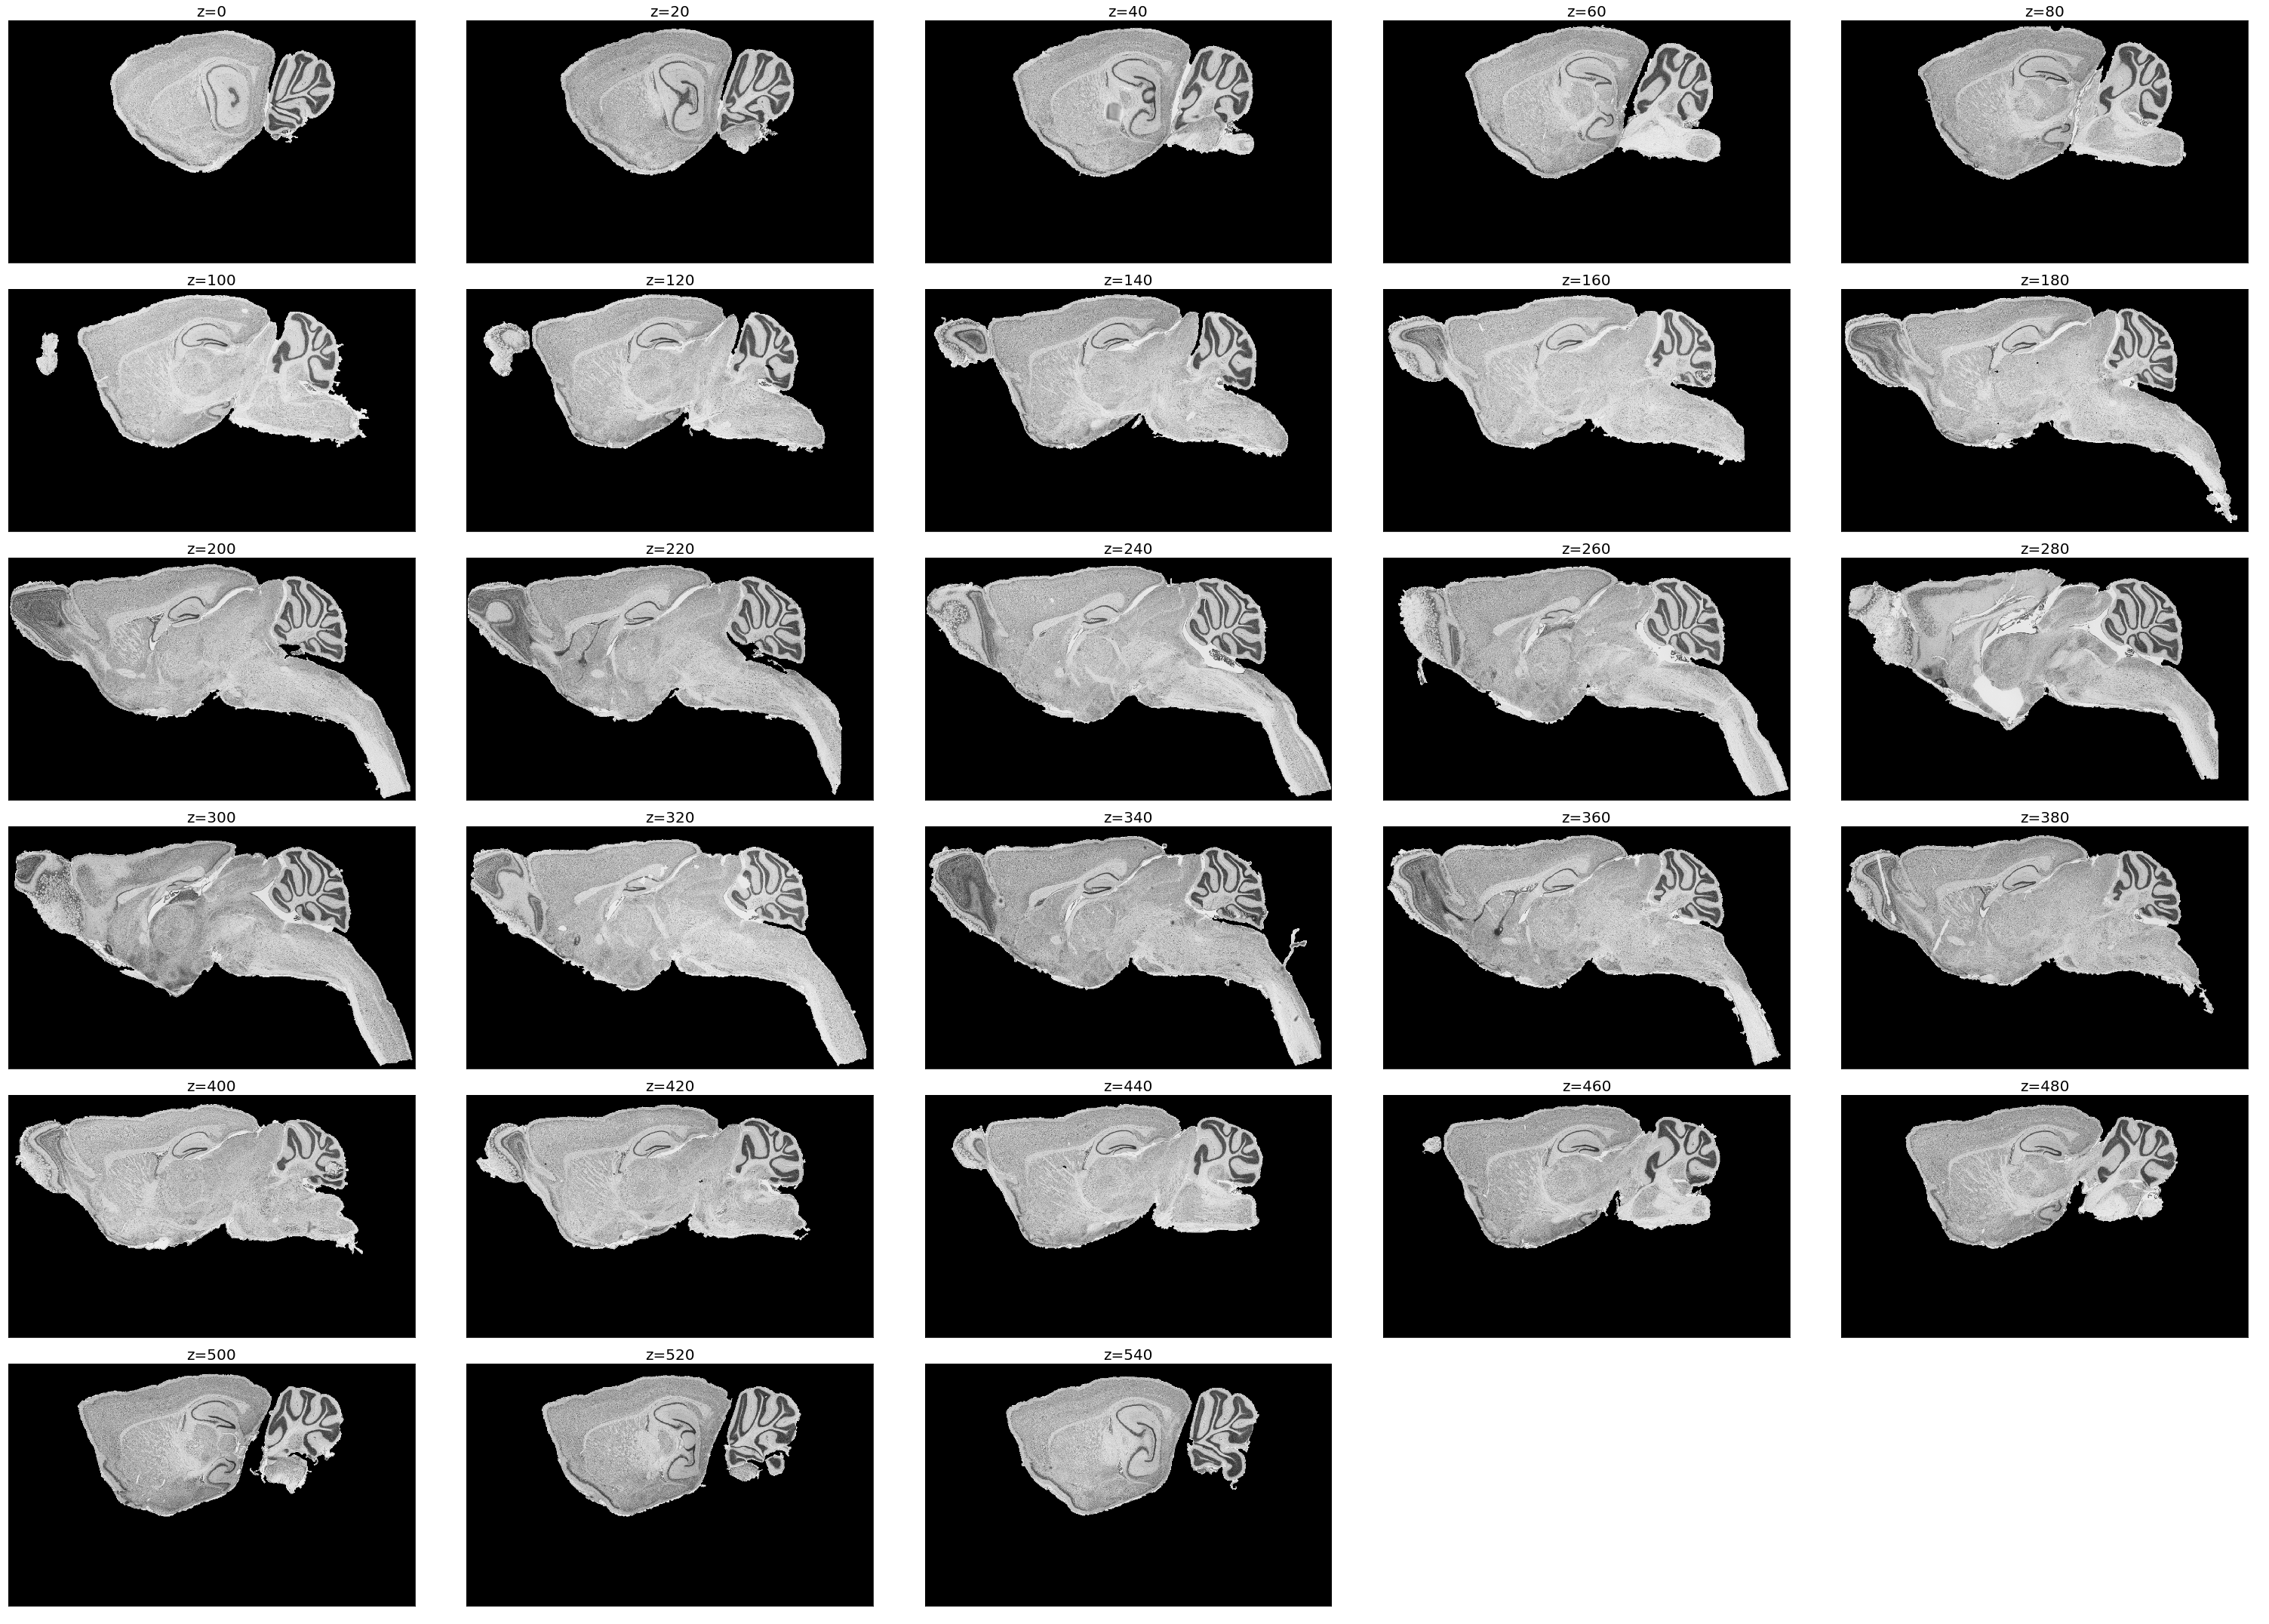

In [26]:
display_volume_sections(volume_outVolResol, cmap=plt.cm.gray, every=20, title_fontsize=20)

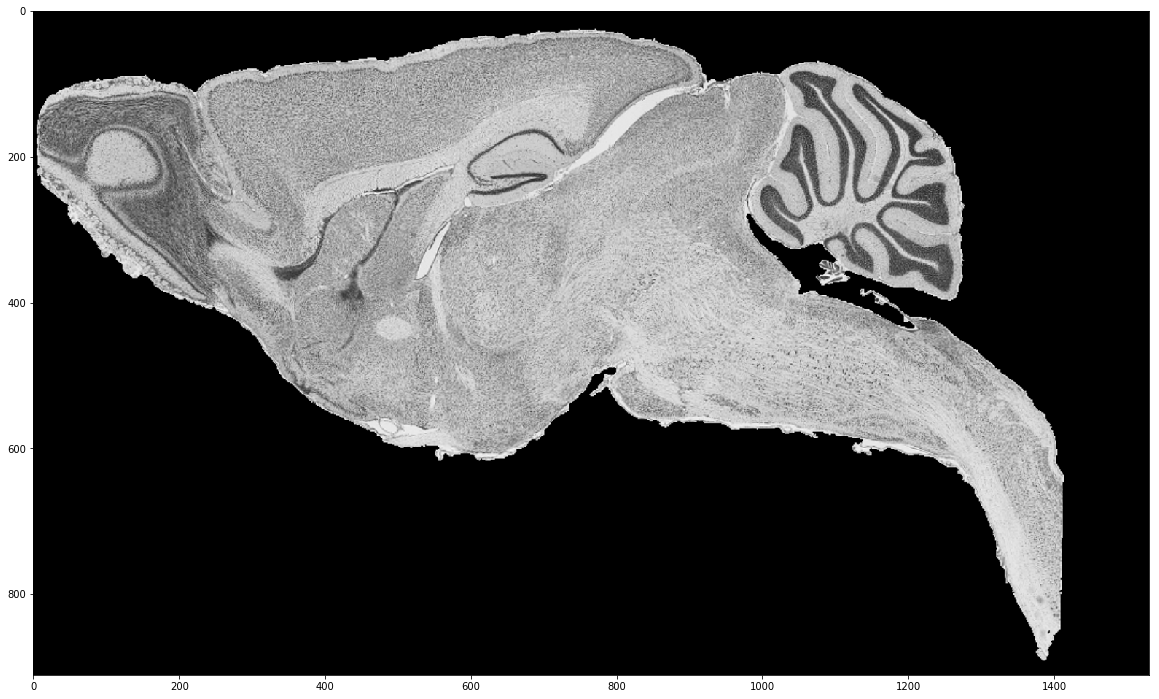

In [27]:
plt.figure(figsize=(20,20));
plt.imshow(volume_outVolResol[..., 220], plt.cm.gray)